**

# Basics for numpy

This Notes is based on the book _Python for Data Analysis_  by Wes Mckinney. Numpy is a must-learn library for Python programmer, as it's the backbone for numerical computing and data analysis related work in python.

As the author says, "While NumPy by itself does not provide modeling or scientific functionality, having an understanding of NumPy arrays and array-oriented computing will help you use tools with array-oriented semantics, like pandas, much more effectively." So there is no need for hestitation to learn the lib right now -- it's important , useful and fundamental.


### Table of content
1. Ndarray
2. the Universal Functions
3. Array Oriented Programming with Arrays
4. Linear Algebra
5. Random Numbers/Sequence Generation


In [1]:
import numpy as np
# always import numpy first
import matplotlib.pyplot as plt


### 1. The NumPy ndarray: A Multidimensional Array Object

To get the hang of numpy, the core is to understand ndarray itself.
Similar to all other object oriented design, it's an C-based struct, with attributes(member): **data buffer(in heap)&associated data pointer, shape, dtype, stride.**
| Component           | Meaning                                                                           |
| ------------------- | --------------------------------------------------------------------------------- |
| **data pointer**    | address of the first byte of the data this array *can access*                     |
| **shape**           | length of each dimension                                                          |
| **strides**         | how many bytes to jump in memory to move to the next element along each dimension |
| **dtype**           | type → determines bytes per element                                               |
| **(optional) base** | reference to another array that owns the data buffer                              |

Data pointer and data buffer design avoid heavy loads for the CPU/RAM. Needless to say, the data are stored linearly in the heap, which saves memory storgage.

Shape(tuple) and strides(tuple), and dtype are related, together describe how are the elements conceptually arranged. This is how you access the element with ease and efficiency: with dtype telling how many bits(bytes) each element takes(C-based np.int32 and np.float64 for example) and shape shape telling how many entries in each **axis**(recall pytorch use the key word dimension, but it's okay), you can calculate many bytes you should jump over when increment the index of some axis -- and that is exactly stride. In C-order traversial, you "stride" over the ndarray with step specified in tupic stride, from axis 0 to the last axis.

For example, `arr[2,3,4]` with `dtype = np.int32` and `shape(4,4,5)` you need to take a step of 20*4 btyes to increment the first index of axis(0).

And that is how you further makes other operation faster. For example, when you `x = arr[2]` you make a **view** of the original array. The term view indicated that we don't need to **copy** the data, instead, you create a new ndarray object with new data pointer(with offset that makes it point to new position), shape, dtype,and stride.
That greatly accelerate the operation and reduce redundant memory usage.

In this section, We will mainly focuse on the basic indexing, creation and modification. But keep the difference of view and copy in mind, which always explains why you result is not as your expectation.

Later we will see how batch level operations are what make numpy array so useful, which makes the operation to be express in simple way but makes the elementwise.
- indexing
- broadcast 
- boolean/fancing Indexing are so common that we can't avoid them.

before we starting introducing the APIs, please note that, a lot np functions are also the built-in methods for numpy arrays. For example, `arr.sum(axis = 0)` and `np.sum(arr, axis = 0)` are identical.

below is a list of methods:
```python
np.empty((8,4))

```



#### Creation functions
![alt text](assets/image.png)

below is the examples of how the APIs are called, with arguments fully-specified:

In [2]:
x = np.arange(start = 0, stop = 10, step = 2) #recall in pytorch you also specify "device"
y = np.asarray(x, dtype = np.float64)
print(x,y)

arr = np.ones(shape = x.shape) #given a shape tuple [1 1 1 1 1]
arr_prime = np.ones_like(x) # same as arr, parameterized in arrays

arr_1 = np.zeros(shape = (2,3))
arr_2 = np.full(y.shape, fill_value= 10) #Return a new array of given shape and type, filled with fill_value.
print(arr_1, arr_2)

arr_3 = np.eye(N = 5)
arr_3



[0 2 4 6 8] [0. 2. 4. 6. 8.]
[[0. 0. 0.]
 [0. 0. 0.]] [10 10 10 10 10]


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### Arithmetic with NumPy Arrays

Arrays are important because they enable you to express batch operations on data
without writing any for loops. NumPy users call this vectorization. Any arithmetic
operations between equal-size arrays applies the operation element-wise, and "> == <" gives you a boolean array.

In [17]:
arr = np.arange(6).reshape(2,3)
print(arr)

print(f" product{arr*arr} ,\nsum {arr+arr} ,\nboolean {arr == arr}")


[[0 1 2]
 [3 4 5]]
 product[[ 0  1  4]
 [ 9 16 25]] ,
sum [[ 0  2  4]
 [ 6  8 10]] ,
boolean [[ True  True  True]
 [ True  True  True]]


### Basic Indexing and Slicing


NumPy array indexing is a rich topic, as there are many ways you may want to select a subset of your data or individual elements.

One-dimensional arrays are simple; on the surface they act similarly to Python lists, with overriden `__getitem()__`  method implemented for python users.

As you can see, if you assign a scalar value to a slice, as in arr[5:8] = 12, the value is propagated (or broadcasted henceforth) to the entire selection.Recall that array slices are views on the original array. Hence given the data is not copied, and any modifications to the view will be reflected in the source array.

For higher dimensional array the accessing method is similar, which you use index to specify the block inside array like you do in the geometric with coordinates values.


In [18]:
arr = np.arange(10)
arr[5:8] = 12
print(arr)#the source arr changes after a modification on the slice

arr2d = np.arange(1,10).reshape(3,3)
print(arr2d[2,2])

#when you used copy,nothing will be change on the original array
x = arr2d[1].copy()
print(x)
x = 1
print(x, arr2d[1])


[ 0  1  2  3  4 12 12 12  8  9]
9
[4 5 6]
1 [4 5 6]


- Boolean Indexing

Boolean function is especially used alongside with boolean index, that is, when you do logic comparison between 2 array , the resulting output is a boolean array contains True or False. you can use this boolean array with same shape(or after broadcast) to filter out the desired element.

for Boolean indexing , it always makes a copy, not a view.
However, numpy offer you a direct way of modification with boolean indexing -- -= *= operaters are overriden to write the changes into the original array.

- Fancy indexing 
  
Fancy indexing is a term adopted by NumPy to describe indexing using integer arrays(or indexing using a list).Suppose we had an 8 × 4 array, you can select rows not in sequential order(the memory can be uncontiguoes, so in order to make sure the extracted array data is still contiguous, numpy create a copy instead of view.)

Passing multiple index arrays does something slightly different; it selects a one-
dimensional array of elements corresponding to each tuple of indices

In [ ]:
arr = np.array([[1,-2,3],[-4,5,6]])
arr[arr<0] *= -1 # *= is overriden so that boolean index copy are written back into the orginal array.
print(arr) # quick abs function, which can be alway achieved with np.abs()

arr = np.empty((8,4)) 
for i in range(8):
    arr[i] = i
print(arr)
# select some rows with a indexing list as argument
arr[[4, 1, 2, 3]]
#select some with rows + columns coordinate infomation
arr[[4, 1, 2, 3],[1, 1, 2, 3]]
#check the data type
arr.dtype # ha! default dtype = np.float64

#use mask to clear the value
arr_1 = np.random.randint(low = -10, high = 7, size = (7, 7))
print(arr_1)
mask = (arr_1 >= -2) & (arr_1 <= 2)# in numpy use c-prefer logic operator instead if and/or  
arr_1[mask] = 0 # this makes copy but write back to the original array
print(arr_1)  
#alternatively use ufunc
arr_2 = np.where(mask, 0, arr_1) # mask should be a boolean array, for condition switch.
print(arr_2==arr_1)

[[1 2 3]
 [4 5 6]]
[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]
[[ -6  -6  -4  -6  -9 -10  -3]
 [ -2  -6 -10  -8  -7  -2  -8]
 [  0 -10  -1  -2  -4   6   0]
 [ -2  -9  -2  -4  -7   4  -2]
 [ -6   2   6   1 -10  -4   2]
 [  5  -6   3  -1  -8  -6  -4]
 [ -3   0 -10   4   0 -10   4]]
[[ -6  -6  -4  -6  -9 -10  -3]
 [  0  -6 -10  -8  -7   0  -8]
 [  0 -10   0   0  -4   6   0]
 [  0  -9   0  -4  -7   4   0]
 [ -6   0   6   0 -10  -4   0]
 [  5  -6   3   0  -8  -6  -4]
 [ -3   0 -10   4   0 -10   4]]
[[ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True]]


### reshape and transpose
reshape change the conceptual data object(without touch the data layout, only implemented by create a view of different data pointer and stride tuple)

Transposing is a special form of reshaping that similarly returns a view on the underlying data without copying anything. Arrays have the transpose method and also the special `.T` attribute

For higher dimensional arrays, transpose will accept a tuple of axis numbers to permute the axes (for extra mind bending). But numpy offer you a simple way, `swapaxes`, which takes a pair of axis numbers and switches the indicated axes to rearrange the data, make offer a great amount of convenience especially when you dealing with data of high dimensions


In [6]:
arr = np.arange(16).reshape((4, 4))
print(arr)
print(arr.T)
arr.swapaxes(0,1)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[ 0  4  8 12]
 [ 1  5  9 13]
 [ 2  6 10 14]
 [ 3  7 11 15]]


array([[ 0,  4,  8, 12],
       [ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15]])

### Universal Funtions: Fast Element wise Array Functions

A universal function, or ufunc, is a function that performs element-wise operations
on data in ndarrays. You can think of them as fast vectorized wrappers for simple
functions that take one or more scalar values and produce one or more scalar results.



Universal function that takes 1 array as argument
![alt text](assets/image-1.png)


In [7]:
#Binary ufuncs
#most common binary ufuncs can be simply called in a+b, a-b, a*b, a%d

#minimum not min
#maximum not max
arr = np.random.randint(10, size = (2,7)) * 5
arr_1 = np.random.randint(10, size = (2,7)) * 5
print(np.maximum(arr, arr_1))
print(arr)
np.min(arr,axis = 1, keepdims=True) # find the minimum within 1 array

[[25 40 10 25 25 40 40]
 [40 40 25 40 35 20 35]]
[[25 40 10 10 25 40 20]
 [40 25 25 10 35 20 35]]


array([[10],
       [10]])

### Array Oriented Programming with Arrays



![alt text](assets/image-2.png)

In [ ]:
#statistical functions like sum mean max 
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(arr.cumsum(axis = 0), "\n",arr.cumsum(axis = 1)) # use axis as input
arr.var() #std/var

[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]] 
 [[ 0  1  3]
 [ 3  7 12]
 [ 6 13 21]]


np.float64(6.666666666666667)

(100, 100)


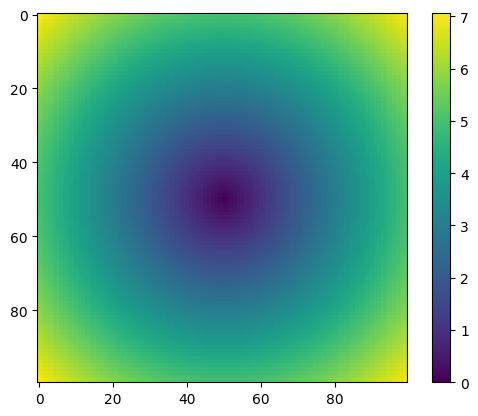

In [26]:
# depict sphere contour using thermal graph on x-y plane
points = np.arange(-5,5,0.1)
xs, ys = np.meshgrid(points, points)
#the points in a coordinate sheet way

z = np.sqrt(xs**2 + ys**2)
print(z.shape)
plt.imshow(z)
plt.colorbar()
plt.show()

In [29]:
xarr = np.array([1, 2, 3, 4, 5])
yarr = np.array([6, 7, 8, 9, 10])
cond = [True, True, False, False, True]

result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
print(result)

result = np.where(cond, xarr, yarr)
print(result)

[np.int64(1), np.int64(2), np.int64(8), np.int64(9), np.int64(5)]
[1 2 8 9 5]


In [28]:
arr = np.random.randn(5,4)
arr.mean( keepdims = True)

array([[-0.00046665]])

In [30]:
print(arr.cumsum())
1.49/20

[ 0.95888156  1.8703606   2.53109871  3.0486454   2.75041297  2.37415562
  2.11306941  3.48279944  3.7257915   4.28743641  3.13051909  2.73036344
  0.95667666 -0.50686321 -1.16588359 -0.33174467 -0.42904607  0.55556162
  0.71758336 -0.00933299]


0.0745

### Linear Algebra

matrix multiplication is designed to be `a@b or np.dot(x,y) or x.dot(y)` 

What is more, numpy.linalg has a standard set of matrix decompositions and things like inverse
and determinant. These are implemented under the hood via the same industry-
standard linear algebra libraries used in other languages like MATLAB and R

below are some commonly used methods
#### Table 4-7. Commonly used numpy.linalg functions
| Function | Description |
| --- | --- |
| diag | Return the diagonal (or off-diagonal) elements of a square matrix as a 1D array, or convert a 1D array into a square matrix with zeros on the off-diagonal |
| dot | Matrix multiplication |
| trace | Compute the sum of the diagonal elements |
| det | Compute the matrix determinant |
| eig | Compute the eigenvalues and eigenvectors of a square matrix |
| inv | Compute the inverse of a square matrix |
| pinv | Compute the Moore-Penrose pseudo-inverse of a matrix |
| qr | Compute the QR decomposition |
| svd | Compute the singular value decomposition (SVD) |
| solve | Solve the linear system Ax = b for x, where A is a square matrix |
| lstsq | Compute the least-squares solution to Ax = b |

In [ ]:
from numpy.linalg import inv, qr

mat = np.random.randn(5,5)
np.astype(inv(mat)@mat, np.int32)
q, r = qr(mat)
np.astype(q@(q.T), np.int32) #verify Q*Q^T = I


array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]], dtype=int32)

### Pseudorandom Number Generation
![alt text](assets/image-3.png)

In [14]:
samples = np.random.normal(loc = 1, scale = 1, size=(4, 4))
print(samples)
#create an independent random number generator
rng = np.random.RandomState(seed = 1000)
samples_1 = rng.binomial(n = 10, p = 1/2, size = 7)
print(samples_1)

samples_1[2:-1].base


[[ 0.31154296  2.32734087  0.77608035  1.77351494]
 [ 0.59933947  1.27401586  0.15690064 -0.62036824]
 [ 0.18382223  3.02254945 -0.55954233 -0.1087359 ]
 [ 1.06168173  1.56892766  0.48167083  0.53966784]]
[6 3 8 5 7 4 2]


array([6, 3, 8, 5, 7, 4, 2])

### Assorted Functions

- base 
- isnan
- issubdtype
- reshape and flatten(copy) ravel(view)
- Concatenating and Splitting Arrays
- repeating array

![alt text](assets/image-4.png)

In [32]:
#numpy.concatenate takes a sequence (tuple, list, etc.) of arrays and joins them
#together in order along the input axis

arr_1 = np.arange(10).reshape((2,5))
arr_2 = np.arange(10,20).reshape((2,5))

arr = np.concatenate([arr_1, arr_2], axis = 0)
print(arr)

print(np.vstack((arr_1, arr_2)))
print(np.hstack([arr_1,arr_2]))


[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
[[ 0  1  2  3  4 10 11 12 13 14]
 [ 5  6  7  8  9 15 16 17 18 19]]


In [35]:
arr = np.arange(3)
arr.repeat([1,2,3], axis = 0)
print(arr.repeat([1,2,3], axis = 0))
print(arr.reshape(3,1).repeat(2, axis = 0))
#Multidimensional arrays can have their elements repeated along a particular axis.
arr = np.random.normal(size = (2,3))
arr.repeat(2) # no axis specified, first flatten , then repeating 
arr.repeat([2, 3], axis=0) #repeat the element on the first axis twice, second 3 times.
arr.repeat([2, 3, 2], axis=1)
np.tile(arr, 2) # repeat as a whole
np.tile(arr, (3, 2))#The second argument to tile can be a tuple indicating the layout of the “tiling”

[0 1 1 2 2 2]
[[0]
 [0]
 [1]
 [1]
 [2]
 [2]]


array([[ 0.14181952, -0.46212001,  0.18051943,  0.14181952, -0.46212001,
         0.18051943],
       [ 0.20351556,  0.82109748,  0.06118887,  0.20351556,  0.82109748,
         0.06118887],
       [ 0.14181952, -0.46212001,  0.18051943,  0.14181952, -0.46212001,
         0.18051943],
       [ 0.20351556,  0.82109748,  0.06118887,  0.20351556,  0.82109748,
         0.06118887],
       [ 0.14181952, -0.46212001,  0.18051943,  0.14181952, -0.46212001,
         0.18051943],
       [ 0.20351556,  0.82109748,  0.06118887,  0.20351556,  0.82109748,
         0.06118887]])